# Experiments for: "Data-Driven Bayesian Parameter Estimation with Neural Networks"

- Test influence of ``num_simulations`` on posterior distribution


In [15]:
# Import the sbi library and other dependencies
from sbi.inference import SNPE, infer
from sbi.analysis import *
from sbi.utils import *
from simulators.simulator_functions import swing_equation
import sbi
import torch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Define the prior distribution over the parameters H and D
# Use a uniform distribution with lower and upper bounds
prior = sbi.utils.BoxUniform(low=torch.tensor([0.1, 0.1]), high=torch.tensor([10.0, 10.0]))

# Define the true parameters for the simulator
theta_true = torch.tensor([8.0, 8.0])

# Generate observed data using the simulator and true parameters
x_o = swing_equation(theta_true)

In [57]:
# Define the number of simulations to run for each posterior
num_simulations_options = [100, 1000, 10000]

# Initialize an empty list to store the posteriors
posteriors = []

# For each number of simulations, infer the posterior and add it to the list
for n in num_simulations_options:
    posterior = infer(swing_equation, prior, method='SNPE', num_simulations=n)
    posterior.set_default_x(x_o)
    posteriors.append(posterior)


Running 100 simulations.:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations.: 100%|██████████| 100/100 [00:05<00:00, 18.23it/s]


 Neural network successfully converged after 195 epochs.

Running 1000 simulations.: 100%|██████████| 1000/1000 [00:51<00:00, 19.26it/s]


 Neural network successfully converged after 105 epochs.

Running 10000 simulations.: 100%|██████████| 10000/10000 [08:35<00:00, 19.40it/s]


 Neural network successfully converged after 185 epochs.

# Results

- comparison of ``prior``, ``posterior`` and ``theta_true`` with ``num_simulations`` being either 100, 1000 or 10000.

In [58]:
# plot prior and posterior of given parameters
def plot_prior_posterior(prior, posterior, theta_true, path):

    # label plots
    labels = ['H', 'D']

    # draw subplots 
    fig, axes = plt.subplots(1, 2, figsize=(12,4))  

    for i in range(2):

        # sample 1000 from prior and posterior
        prior_samples = prior.sample((10000,))[:,i]
        posterior_samples = posterior.sample((10000,))[:,i]

        # draw density plot for each parameter using prior
        sns.kdeplot(prior_samples, ax=axes[i], fill=True, label='prior')  
        sns.kdeplot(posterior_samples, ax=axes[i], fill=True, label='posterior')
  
        # label the plots
        axes[i].set_xlabel(labels[i])
        axes[i].set_ylabel('Density')

        # draw true value for comparison
        axes[i].axvline(theta_true[0][i], color='red', label='theta_true') # true value

    # add legend for plot
    axes[1].legend()

    # save plot
    plt.tight_layout()
    plt.savefig(path, format="pdf", bbox_inches="tight")
    plt.show()

## Compare ``num_simulations`` influence on posterior distribution

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples: 10641it [00:00, 48400.43it/s]                          
Drawing 10000 posterior samples: 10597it [00:00, 44801.78it/s]                          


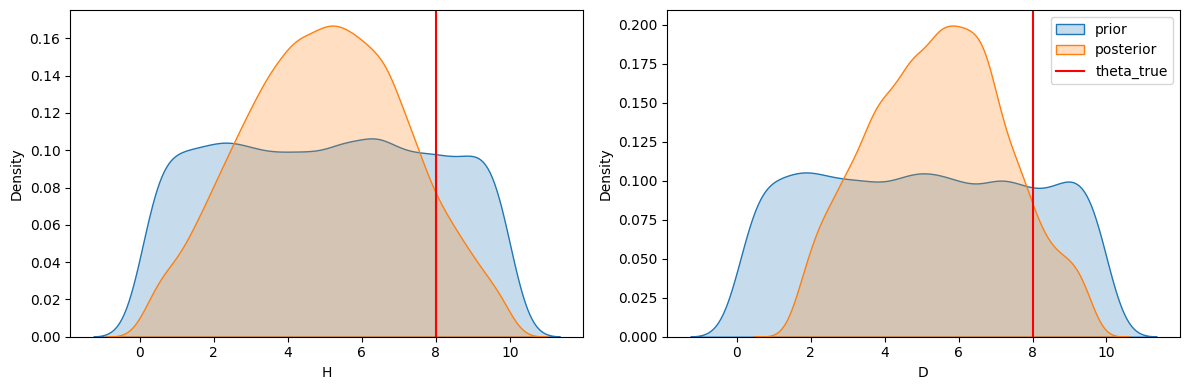

Drawing 10000 posterior samples: 10707it [00:00, 39578.29it/s]                          
Drawing 10000 posterior samples: 10757it [00:00, 53318.07it/s]                          


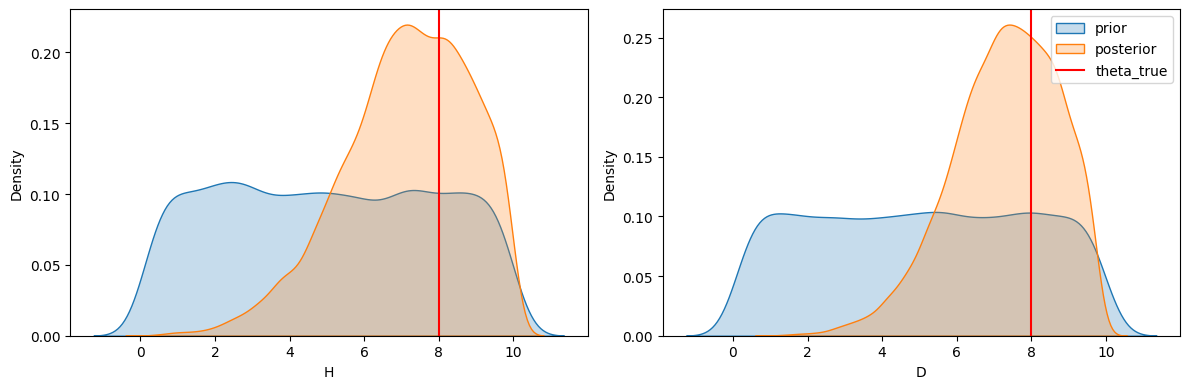

Drawing 10000 posterior samples: 10058it [00:00, 55729.02it/s]                          
Drawing 10000 posterior samples: 10067it [00:00, 57798.10it/s]                          


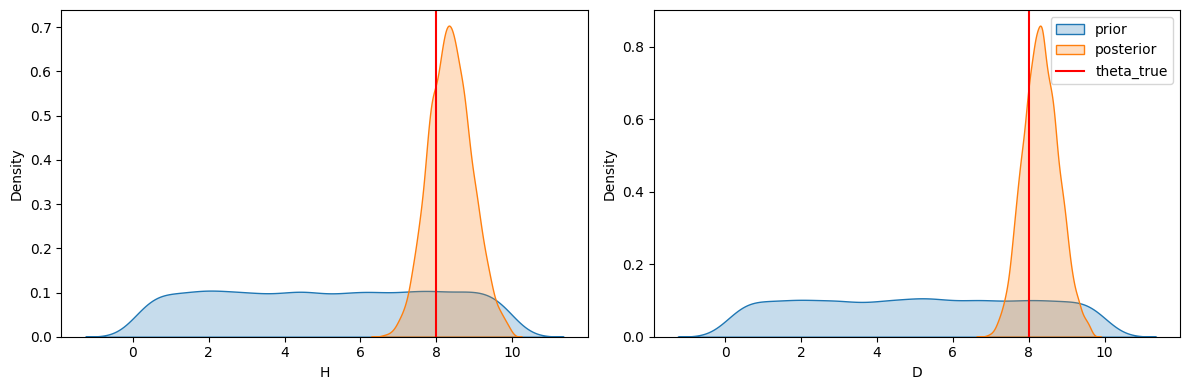

In [59]:
# Define the prefix and suffix for the file path
path_prefix = "../../pdf_out/prior_posterior_ns_"
path_suffix = ".pdf"

# Iterate over each posterior and corresponding number of simulations
for posterior, n in zip(posteriors, num_simulations_options):

    # Construct the full file path by concatenating the prefix, number of simulations, and suffix
    path = path_prefix + str(n) + path_suffix
    
    # Plot the prior and posterior, and save the plot to the specified file path
    plot_prior_posterior(prior, posterior, [theta_true], path)
